In [ ]:
import sys
import subprocess

subprocess.check_call([
    sys.executable, "-m", "pip", "install",
    "pandas", "numpy", "matplotlib", "seaborn", "scikit-learn", "statsmodels"
])

In [ ]:
import pandas as pd
import sklearn
import statsmodels

print("pandas:", pd.__version__)
print("sklearn:", sklearn.__version__)
print("statsmodels:", statsmodels.__version__)

In [9]:
import pandas as pd

df = pd.read_csv("../EDA and Hypothesis Testing/country_screen_vs_interest.csv")
df.head()

,Country,Avg_Daily_Usage_Hours,Avg_Search_Interest,Country_Code
0,USA,6.890000,45.886364,US
1,Mexico,6.422222,27.909091,MX
2,Ecuador,6.300000,17.909091,EC
3,India,6.116981,26.704545,IN
4,Czech Republic,6.100000,25.181818,CZ


Now I check the csv I created in EDA and hypothesis testing part.

In [10]:
print(df.columns)
print(df.isna().sum())
print(df.describe())

Index(['Country', 'Avg_Daily_Usage_Hours', 'Avg_Search_Interest',
       'Country_Code'],
      dtype='object')
Country                  0
Avg_Daily_Usage_Hours    0
Avg_Search_Interest      0
Country_Code             0
dtype: int64
       Avg_Daily_Usage_Hours  Avg_Search_Interest
count              73.000000            73.000000
mean                4.522969            28.693960
std                 1.123926            18.395826
min                 2.000000             2.272727
25%                 3.650000            14.318182
50%                 4.700000            27.909091
75%                 5.400000            39.545455
max                 6.890000            78.272727


In [12]:
# Define feature (X) and target (y)
X = df[["Avg_Daily_Usage_Hours"]] # feature
y = df["Avg_Search_Interest"] # target

print("X shape:", X.shape)
print("y shape:", y.shape)

print("\nX preview:")
print(X.head())

print("\ny preview:")
print(y.head())

X shape: (73, 1)
y shape: (73,)

X preview:
   Avg_Daily_Usage_Hours
0               6.890000
1               6.422222
2               6.300000
3               6.116981
4               6.100000

y preview:
0    45.886364
1    27.909091
2    17.909091
3    26.704545
4    25.181818
Name: Avg_Search_Interest, dtype: float64


X is 2D here because I am using a dataframe.(independent variable)
Y is 1D because a series is used.(dependent variable)

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, # features
    y, # target
    test_size=0.2, # proportion for test set
    random_state=42 # fixed randomness (to make results reproducable)
)

# Check the sizes to confirm split worked
print("Training feature shape:", X_train.shape)
print("Testing feature shape:", X_test.shape)

print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training feature shape: (58, 1)
Testing feature shape: (15, 1)
Training target shape: (58,)
Testing target shape: (15,)


Splitting the dataset for training step: 
Splitting is done as %80 for training, %20 for testing. (standart ratio)

In [ ]:
from sklearn.linear_model import LinearRegression

# 1) Create the model object (not trained yet)
lin_model = LinearRegression()

# 2)Train the model on the training data
# This estimates β0 (intercept) and β1 (slope) that best minimize squared error on trained data
lin_model.fit(X_train, y_train)

# 3)Print the learned parameters to examine
print("Intercept (β0):", lin_model.intercept_)   # predicted interest when screen time = 0
print("Slope (β1):", lin_model.coef_[0])         # change in interest per +1 hour screen time


Intercept (β0): 14.229413376881523
Slope (β1): 3.4951199691770922


Training a Linear regression model step.

In [16]:
y_pred = lin_model.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 16.486673178285315


RMSE shows the typical prediction error in interest points.

In [18]:
df["Avg_Search_Interest"].describe()


count    73.000000
mean     28.693960
std      18.395826
min       2.272727
25%      14.318182
50%      27.909091
75%      39.545455
max      78.272727
Name: Avg_Search_Interest, dtype: float64

In [19]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R²:", r2)


R²: -0.5712778955483406


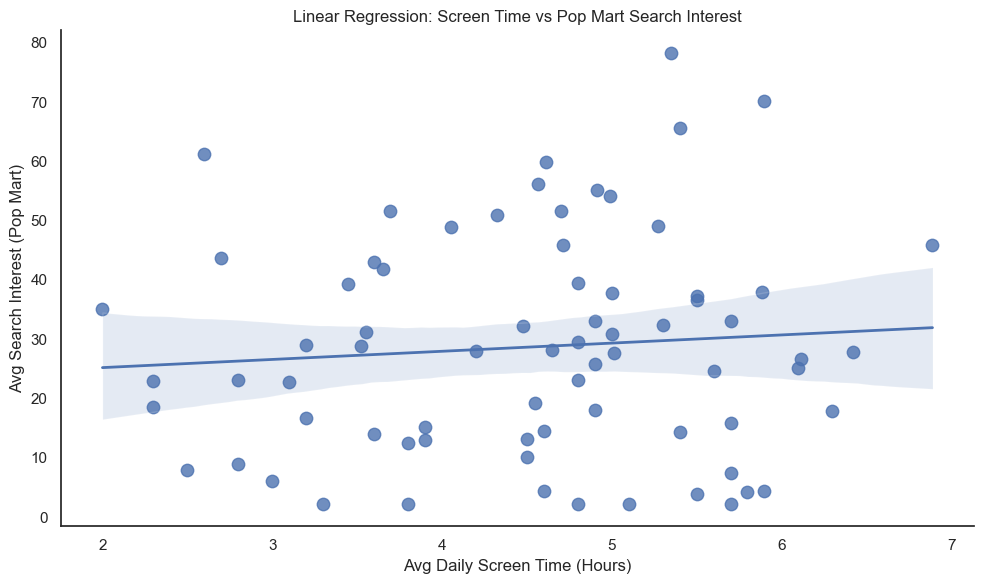

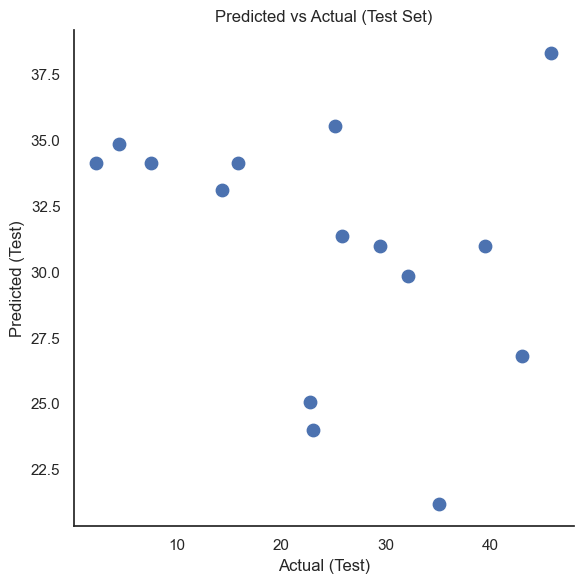

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white")

# Regression line on full dataset
plt.figure(figsize=(10, 6))
sns.regplot(
    data=pd.concat([X, y], axis=1),
    x="Avg_Daily_Usage_Hours",
    y="Avg_Search_Interest",
    scatter_kws={"s": 80},
    line_kws={"linewidth": 2}
)
plt.title("Linear Regression: Screen Time vs Pop Mart Search Interest")
plt.xlabel("Avg Daily Screen Time (Hours)")
plt.ylabel("Avg Search Interest (Pop Mart)")
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

# Predicted vs Actual (test set)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, s=80)
plt.xlabel("Actual (Test)")
plt.ylabel("Predicted (Test)")
plt.title("Predicted vs Actual (Test Set)")
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()


We get 15 dots in the test table because we have 74 countries. We are predicting %20 of them so it is around 15 countries.

Now evaluating the regression model step:
Even if we got a positive slope β1 in the training part we got a negative R^2. This means that my model performs worse than a simple baseline that predicts mean for every country. Since we did not get a good R^2 value we can conclude that a straight line is too simple to decide therefore we can use nonlinear ways such as 1-Polynomial regression, 2-Decision tree regression or 3-kNN regression.

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_deg2 = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin", LinearRegression())
])

poly_deg2.fit(X_train, y_train)

y_pred_poly2 = poly_deg2.predict(X_test)


In [24]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse_poly2 = np.sqrt(mean_squared_error(y_test, y_pred_poly2))
r2_poly2 = r2_score(y_test, y_pred_poly2)

print("Polynomial Regression (degree=2)")
print("RMSE:", rmse_poly2)
print("R²:", r2_poly2)


Polynomial Regression (degree=2)
RMSE: 16.41301341475996
R²: -0.5572688346112706


1-Polynomial Regression Step:
Now I used 2nd degree polynomial. We see a really small improvement. So I will try a higher degree (3rd degree polynomial).

In [25]:
poly_deg3 = Pipeline([
    ("poly", PolynomialFeatures(degree=3, include_bias=False)),
    ("lin", LinearRegression())
])

poly_deg3.fit(X_train, y_train)
y_pred_poly3 = poly_deg3.predict(X_test)

rmse_poly3 = np.sqrt(mean_squared_error(y_test, y_pred_poly3))
r2_poly3 = r2_score(y_test, y_pred_poly3)

print("Polynomial Regression (degree=3)")
print("RMSE:", rmse_poly3)
print("R²:", r2_poly3)


Polynomial Regression (degree=3)
RMSE: 18.40811516282477
R²: -0.9588698805714162


I applied 3rd degree polynomial regression but it shows that the values worsened when a higher degree is tried. So we stop here because it means overfitting. I will try another model (2-Decision Tree Regression) becasue this did not turn out much more better than linear model. 

In [26]:
from sklearn.tree import DecisionTreeRegressor

tree_depth3 = DecisionTreeRegressor(
    max_depth=3,
    min_samples_leaf=2,
    random_state=42
)

tree_depth3.fit(X_train, y_train)

y_pred_tree = tree_depth3.predict(X_test)


In [27]:
#evaluating the decision tree
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree (max_depth=3)")
print("RMSE:", rmse_tree)
print("R²:", r2_tree)


Decision Tree (max_depth=3)
RMSE: 19.88988024871825
R²: -1.2869216190342976


2-Decision Tree Regression Step:
Now we got even worse R^2 so I understand that this is even a worse option. I will compute the next model KNN Regression.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

knn_results = {}  #store each k

for k in [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]:
    knn = Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsRegressor(n_neighbors=k))
    ])
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    knn_results[k] = {"RMSE": rmse, "R2": r2}

#show them in a table
knn_table = pd.DataFrame(knn_results).T.reset_index().rename(columns={"index": "k"})
knn_table


,k,RMSE,R2
0,1,27.234620,-3.287751
1,3,19.802826,-1.266947
2,5,15.656019,-0.416934
3,7,15.723830,-0.429235
4,9,16.674376,-0.607260
5,11,18.173551,-0.909266
6,13,18.240256,-0.923308
7,15,16.985889,-0.667875
8,17,16.689945,-0.610263
9,19,16.942328,-0.659331


In [ ]:
#extracting the best two values for further comparision between models
rmse_knn5 = knn_results[5]["RMSE"]
r2_knn5   = knn_results[5]["R2"]

rmse_knn7 = knn_results[7]["RMSE"]
r2_knn7   = knn_results[7]["R2"]

print("k=5 =>", rmse_knn5, r2_knn5)
print("k=7 =>", rmse_knn7, r2_knn7)


k=5 => 15.656018786473917 -0.41693396523507076
k=7 => 15.72382990278502 -0.42923491605747843


3- KNN Regression step:
I tried KNN with multiple k values to be able to compare them. We see that R^2 only get better than the linear model at k=5 and k=7. It improved slightly again but still R^2 is negative so it does not indicates any useful information.

In [42]:
results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Polynomial (deg=2)",
        "Decision Tree (depth=3)",
        "KNN (k=5)",
        "KNN (k=7)"
    ],
    "RMSE": [rmse, rmse_poly2, rmse_tree, rmse_knn5, rmse_knn7],
    "R²":   [r2,   r2_poly2,   r2_tree,   r2_knn5,   r2_knn7]
})

results


,Model,RMSE,R²
0,Linear Regression,17.429005,-0.756031
1,Polynomial (deg=2),16.413013,-0.557269
2,Decision Tree (depth=3),19.889880,-1.286922
3,KNN (k=5),15.656019,-0.416934
4,KNN (k=7),15.723830,-0.429235


I compared all the models I tested. According to the results, all regression models give negative meaning none of the models gives better results than predicting the mean search interest for all countries. But among these five, KNN is the best behvaing model sine R^2 is the closest to 0 and it has the lowest RMSE(Root Mean Squared Error) meaning that average prediction error is the lowest. In short we conclude that increasing screen time is not sufficient to predict consumer behaviour. So I am going to look for more features to make my predictions more accurate.

In [112]:
import pandas as pd

# 1) Country-level dataset (original ML target)
country_df = pd.read_csv("../EDA and Hypothesis Testing/country_screen_vs_interest.csv")

# 2) Individual-level dataset (source for new features)
students_df = pd.read_csv("../EDA and Hypothesis Testing/Students Social Media Addiction.csv")

print("country_df columns:", country_df.columns.tolist())
print("students_df columns:", students_df.columns.tolist())

print(country_df.head())
print(students_df.head())


country_df columns: ['Country', 'Avg_Daily_Usage_Hours', 'Avg_Search_Interest', 'Country_Code']
students_df columns: ['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country', 'Avg_Daily_Usage_Hours', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Relationship_Status', 'Conflicts_Over_Social_Media', 'Addicted_Score']
          Country  Avg_Daily_Usage_Hours  Avg_Search_Interest Country_Code
0             USA               6.890000            45.886364           US
1          Mexico               6.422222            27.909091           MX
2         Ecuador               6.300000            17.909091           EC
3           India               6.116981            26.704545           IN
4  Czech Republic               6.100000            25.181818           CZ
   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2

In [113]:

# Keep only relevant columns and drop missing Country
students_small = students_df[["Country", "Age", "Gender", "Most_Used_Platform"]].copy()
students_small = students_small.dropna(subset=["Country"])

# Basic cleaning
students_small["Country"] = students_small["Country"].astype(str).str.strip()
students_small["Gender"] = students_small["Gender"].astype(str).str.strip()
students_small["Most_Used_Platform"] = students_small["Most_Used_Platform"].astype(str).str.strip()

students_small.head()

,Country,Age,Gender,Most_Used_Platform
0,Bangladesh,19,Female,Instagram
1,India,22,Male,Twitter
2,USA,20,Female,TikTok
3,UK,18,Male,YouTube
4,Canada,21,Male,Facebook


In [116]:
#Age features per country
def iqr(s):
    return s.quantile(0.75) - s.quantile(0.25)

age_feats = (
    students_small.groupby("Country")["Age"]
    .agg(
        mean_age="mean",
        median_age="median",
        std_age="std",
        iqr_age=iqr,
        n_students="count"
    )
    .reset_index()
)
age_feats.head()

,Country,mean_age,median_age,std_age,iqr_age,n_students
0,Afghanistan,22.0,22.0,NaN,0.0,1
1,Albania,19.0,19.0,NaN,0.0,1
2,Andorra,19.0,19.0,NaN,0.0,1
3,Argentina,18.0,18.0,NaN,0.0,1
4,Armenia,18.0,18.0,NaN,0.0,1


In [117]:
#Gender distribution per country
gender_props = (
    pd.crosstab(students_small["Country"], students_small["Gender"], normalize="index")
    .add_prefix("gender_")
    .reset_index()
)
gender_props.head()

Gender,Country,gender_Female,gender_Male
0,Afghanistan,0.0,1.0
1,Albania,1.0,0.0
2,Andorra,0.0,1.0
3,Argentina,0.0,1.0
4,Armenia,1.0,0.0


In [118]:
#Used platform distribution per country
platform_props = (
    pd.crosstab(students_small["Country"], students_small["Most_Used_Platform"], normalize="index")
    .add_prefix("plat_")
    .reset_index()
)
platform_props.head()

Most_Used_Platform,Country,plat_Facebook,plat_Instagram,plat_KakaoTalk,plat_LINE,plat_LinkedIn,plat_Snapchat,plat_TikTok,plat_Twitter,plat_VKontakte,plat_WeChat,plat_WhatsApp,plat_YouTube
0,Afghanistan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Albania,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Armenia,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
#Merging the features I found at the upper part
df = country_df.copy()

# Make sure Country strings match format
df["Country"] = df["Country"].astype(str).str.strip()

# Merge all feature tables
df = df.merge(age_feats, on="Country", how="left")
df = df.merge(gender_props, on="Country", how="left")
df = df.merge(platform_props, on="Country", how="left")

# Fill missing engineered features with 0 (means “no info for that country”)
engineered_cols = [c for c in df.columns if c.startswith("gender_") or c.startswith("plat_")] + [
    "mean_age","median_age","std_age","iqr_age","n_students"
]
df[engineered_cols] = df[engineered_cols].fillna(0)

print(df.shape)
df.head()

(73, 23)


,Country,Avg_Daily_Usage_Hours,Avg_Search_Interest,Country_Code,mean_age,median_age,std_age,iqr_age,n_students,gender_Female,...,plat_KakaoTalk,plat_LINE,plat_LinkedIn,plat_Snapchat,plat_TikTok,plat_Twitter,plat_VKontakte,plat_WeChat,plat_WhatsApp,plat_YouTube
0,USA,6.890000,45.886364,US,19.875000,19.0,1.399405,1.0,40,0.900000,...,0.0,0.0,0.0,0.0,0.400000,0.125000,0.0,0.0,0.000000,0.0
1,Mexico,6.422222,27.909091,MX,21.259259,21.0,1.195909,1.0,27,0.185185,...,0.0,0.0,0.0,0.0,0.074074,0.000000,0.0,0.0,0.666667,0.0
2,Ecuador,6.300000,17.909091,EC,19.000000,19.0,0.000000,0.0,1,1.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
3,India,6.116981,26.704545,IN,20.981132,21.0,1.100534,2.0,53,0.377358,...,0.0,0.0,0.0,0.0,0.094340,0.018868,0.0,0.0,0.471698,0.0
4,Czech Republic,6.100000,25.181818,CZ,18.000000,18.0,0.000000,0.0,1,1.000000,...,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [ ]:
feature_cols = [
    "Avg_Daily_Usage_Hours",
    "mean_age",
    "gender_Female",
    "plat_TikTok",
    "plat_Instagram",
    "n_students"
]



In [126]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#Defining the same target again
y = df["Avg_Search_Interest"]

# Features increased
X = df[feature_cols]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model pipeline: scaling + linear regression
lin_model = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])

lin_model.fit(X_train, y_train)
pred = lin_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

print("Linear Regression with engineered features")
print("RMSE:", rmse)
print("R^2:", r2)


Linear Regression with engineered features
RMSE: 15.440010690604021
R^2: -0.3781044551375119


1-Multiple Linear Regression:
This time I added more features but only chose the strong fetaures. So I can see that compared to first linear regression (-0.7 and 17), my results improved to -0.3 and 15 even though they are still negative. So I can conclude that adding more predicting features makes my model better. I will continue with nonlinear models.

In [128]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

poly_model = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("lr", LinearRegression())
])

poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression (degree=2)")
print("RMSE:", rmse_poly)
print("R²:", r2_poly)


Polynomial Regression (degree=2)
RMSE: 29.036439355921683
R²: -3.8738668635033795


2-Polynomial Regression with degree 2:
The R^2 is the worst one yet so I understand that this is not a correct model to use

In [130]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(
    max_depth=3,
    min_samples_leaf=3,
    random_state=42
)

tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree Regression (depth=3)")
print("RMSE:", rmse_tree)
print("R²:", r2_tree)


Decision Tree Regression (depth=3)
RMSE: 22.469523226021437
R²: -1.918600536791092


3-Decision Tree:
Again we see that this model does not fit.

In [131]:
from sklearn.neighbors import KNeighborsRegressor

knn5 = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsRegressor(n_neighbors=5))
])

knn5.fit(X_train, y_train)
y_pred_knn5 = knn5.predict(X_test)

rmse_knn5 = np.sqrt(mean_squared_error(y_test, y_pred_knn5))
r2_knn5 = r2_score(y_test, y_pred_knn5)

print("KNN Regression (k=5)")
print("RMSE:", rmse_knn5)
print("R²:", r2_knn5)


KNN Regression (k=5)
RMSE: 17.23412200933099
R²: -0.7169801319033251


In [132]:
knn7 = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsRegressor(n_neighbors=7))
])

knn7.fit(X_train, y_train)
y_pred_knn7 = knn7.predict(X_test)

rmse_knn7 = np.sqrt(mean_squared_error(y_test, y_pred_knn7))
r2_knn7 = r2_score(y_test, y_pred_knn7)

print("KNN Regression (k=7)")
print("RMSE:", rmse_knn7)
print("R²:", r2_knn7)


KNN Regression (k=7)
RMSE: 16.055686570804404
R²: -0.49020050545542926


4- KNN Regression:
It did not worked the best, still getting negative values.


In [136]:
results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Polynomial (deg=2)",
        "Decision Tree (depth=3)",
        "KNN (k=5)",
        "KNN (k=7)"
    ],
    "RMSE": [
        rmse,
        rmse_poly,
        rmse_tree,
        rmse_knn5,
        rmse_knn7
    ],
    "R²": [
        r2,
        r2_poly,
        r2_tree,
        r2_knn5,
        r2_knn7
    ]
})

results


,Model,RMSE,R²
0,Linear Regression,15.440011,-0.378104
1,Polynomial (deg=2),29.036439,-3.873867
2,Decision Tree (depth=3),22.469523,-1.918601
3,KNN (k=5),17.234122,-0.716980
4,KNN (k=7),16.055687,-0.490201


Now after adding more features and comparing the results, among all the models we tested with both cases (one feature vs more features) best one is the Linear Regression with more features. After trying with more features we are still only getting negative R^2 values meaning that all tested models show that available information is insufficient for predictions.